**Prétraitement des données**
---

**1. Importation des Bibliothèques**

In [1]:
pip install tensorflow

In [2]:
!pip install mtranslate

  Preparing metadata (setup.py) ... done
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3673 sha256=cd3b73c83f47acca2009b75cea1faa071b87e5e5ef1ad28d42f41afa401f14fc
  Stored in directory: /root/.cache/pip/wheels/38/00/7c/b947c5efaf4ddcf011a91b1566f80851ea560351fd81d029ef
Successfully built mtranslate


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

**2. Chargement du Dataset**

In [4]:
df1 = pd.read_csv("Blood_samples_dataset_balanced.csv")
df2 = pd.read_csv("blood_samples_dataset_test.csv")

**3. Exploration des Données**

In [5]:
# Vérification des colonnes
print("Colonnes du premier dataset :", df1.columns)
print("Colonnes du deuxième dataset :", df2.columns)

Colonnes du premier dataset : Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')
Colonnes du deuxième dataset : Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'C

In [6]:
# Vérification du nombre de lignes et de colonnes
print("\nTaille du premier dataset :", df1.shape)
print("Taille du deuxième dataset :", df2.shape)


Taille du premier dataset : (2351, 25)
Taille du deuxième dataset : (486, 25)


In [7]:
# Affichage d'un aperçu des premières lignes
print("\nAperçu du premier dataset : df1.head()")
df1.head()


Aperçu du premier dataset : df1.head()


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [8]:
print("\nAperçu du deuxième dataset :")
df2.head()


Aperçu du deuxième dataset :


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [9]:
print("Maladies dans le dataset d'entraînement :", df1["Disease"].unique())
print("Maladies dans le dataset de test :", df2["Disease"].unique())

Maladies dans le dataset d'entraînement : ['Healthy' 'Diabetes' 'Thalasse' 'Anemia' 'Thromboc']
Maladies dans le dataset de test : ['Thalasse' 'Diabetes' 'Heart Di' 'Anemia' 'Thromboc' 'Healthy']


In [10]:
count_heart_di = df2[df2["Disease"] == "Heart Di"].shape[0]

# Afficher le résultat
print(f"Nombre de lignes contenant 'Heart Di' : {count_heart_di}")

Nombre de lignes contenant 'Heart Di' : 39


**Cancaténation des deux Dataset**

In [11]:
df_novahealth = pd.concat([df1, df2], ignore_index=True)

# Vérifier la nouvelle taille
print("Taille du dataset combiné :", df_novahealth.shape)

# Sauvegarder le dataset fusionné
df_novahealth.to_csv("dataset_nova.csv", index=False)
print("-------------Dataset fusionné enregistré avec succès !-------------")


Taille du dataset combiné : (2837, 25)
-------------Dataset fusionné enregistré avec succès !-------------


**Chargement de la nouvelle Datset**

In [12]:
data=pd.read_csv("dataset_nova.csv")
data

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes


In [13]:
# Vérification du structure des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

**Caractéristiques**

In [14]:
# Affichage des colonnes
print("Colonnes du dataset :\n", df_novahealth.columns)

# Affichage du nombre de lignes et de colonnes
print("\n---> Taille du dataset :", df_novahealth.shape)

Colonnes du dataset :
 Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

---> Taille du dataset : (2837, 25)


In [15]:
print("Valeurs uniques dans 'Disease' :", df_novahealth["Disease"].value_counts())

Valeurs uniques dans 'Disease' : Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64


In [16]:
# Vérification des valeurs manquantes
data.isnull().sum()

,0
Glucose,0
Cholesterol,0
Hemoglobin,0
Platelets,0
White Blood Cells,0
Red Blood Cells,0
Hematocrit,0
Mean Corpuscular Volume,0
Mean Corpuscular Hemoglobin,0
Mean Corpuscular Hemoglobin Concentration,0


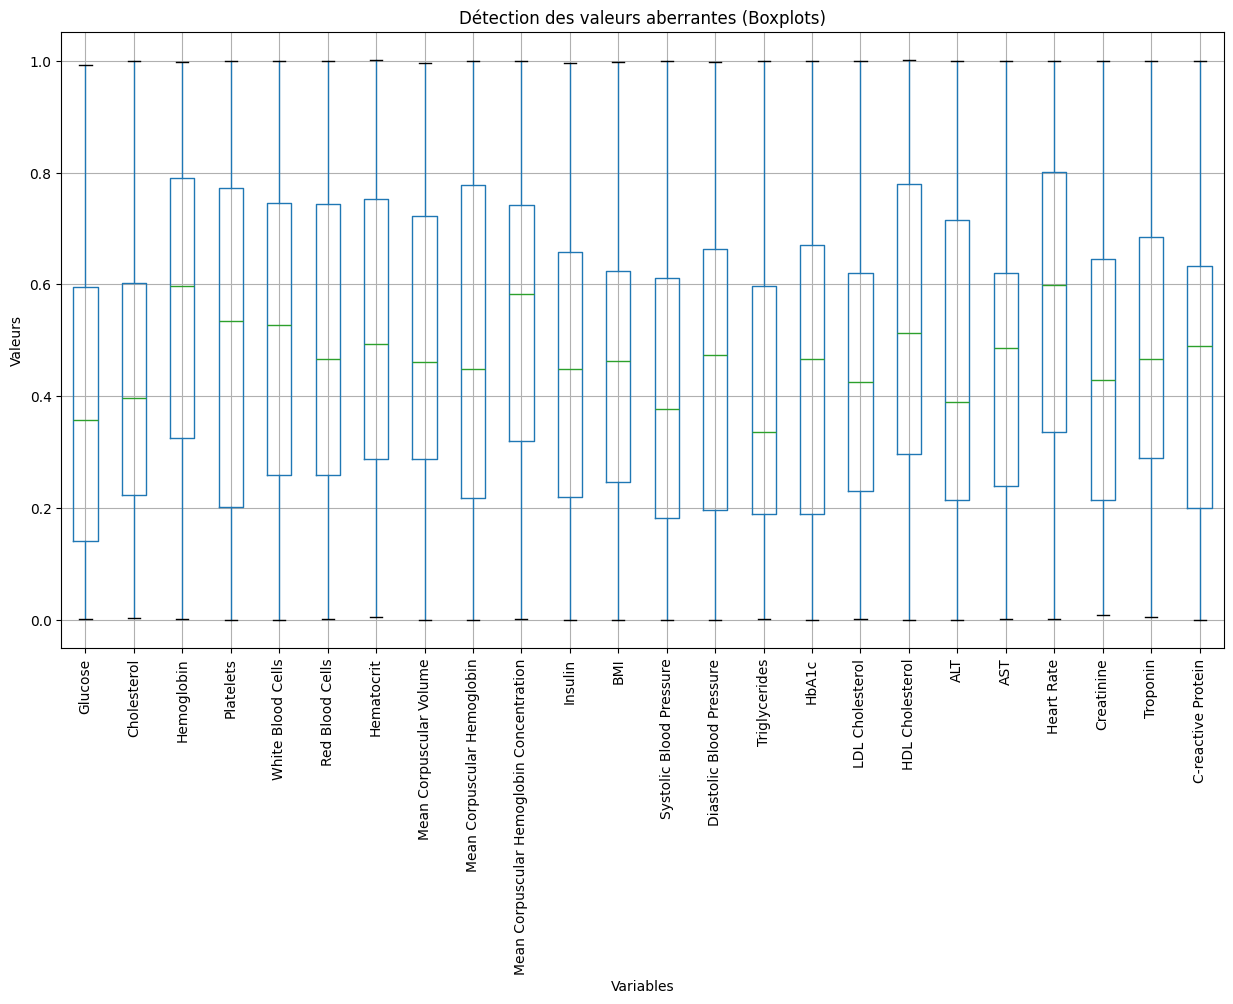

In [17]:
# Vérification des valeurs aberantes
# Suppression de la colonne "Maladie" pour tracer uniquement les variables numériques
df_numeric = data.select_dtypes(include=["number"])

# Tracer les boxplots pour détecter les valeurs aberrantes
plt.figure(figsize=(15, 8))
df_numeric.boxplot(rot=90)  # Rotation des labels pour lisibilité
plt.title("Détection des valeurs aberrantes (Boxplots)")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.show()

In [18]:
# Vérifiction des doublons
df_novahealth.duplicated().sum()

2286

In [19]:
# Suppression des doublons
df_original_cleaned = df_novahealth.drop_duplicates()
print("Après suppression des doublons :",df_original_cleaned.duplicated().sum())

Après suppression des doublons : 0


In [20]:
# Vérification de  la taille après suppression des doublons
print(f"Taille du dataset après suppression des doublons : {df_original_cleaned.shape[0]} lignes")

Taille du dataset après suppression des doublons : 551 lignes


In [21]:
from imblearn.over_sampling import SMOTE
# Séparation X (variables médicales) et Y (target = Disease)
X = df_original_cleaned.drop(columns=["Disease"])
Y = df_original_cleaned["Disease"]

# Vérification la répartition avant SMOTE
print("\nRépartition des maladies avant SMOTE :")
print(Y.value_counts())

# Appliquation SMOTE uniquement sur les classes trop faibles
smote = SMOTE(sampling_strategy={
    "Heart Di": 250,  # Augmenté mais pas trop
    "Thromboc": 200,
    "Thalasse": 200,
    "Healthy": 200,
    "Anemia": 200
}, random_state=42)

X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Vérification de  la répartition après SMOTE
print("\nRépartition des maladies après SMOTE :")
print(pd.Series(Y_resampled).value_counts())

# Reconstituer le dataset équilibré
df_balanced_fin = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced_fin["Disease"] = Y_resampled

# Sauvegarder le dataset final propre et équilibré
df_balanced_fin.to_csv("dataset_nova_final_corrected_end.csv", index=False)

print("✅ Dataset final corrigé après suppression des doublons et SMOTE bien appliqué !")


Répartition des maladies avant SMOTE :
Disease
Diabetes    310
Anemia      100
Thalasse     62
Heart Di     39
Healthy      21
Thromboc     19
Name: count, dtype: int64

Répartition des maladies après SMOTE :
Disease
Diabetes    310
Heart Di    250
Healthy     200
Thalasse    200
Anemia      200
Thromboc    200
Name: count, dtype: int64
✅ Dataset final corrigé après suppression des doublons et SMOTE bien appliqué !


---> Deux  diagrammes circulaires sont créés pour comparer la répartition des maladies avant et après **iliminations des doublons et le Smothing.**

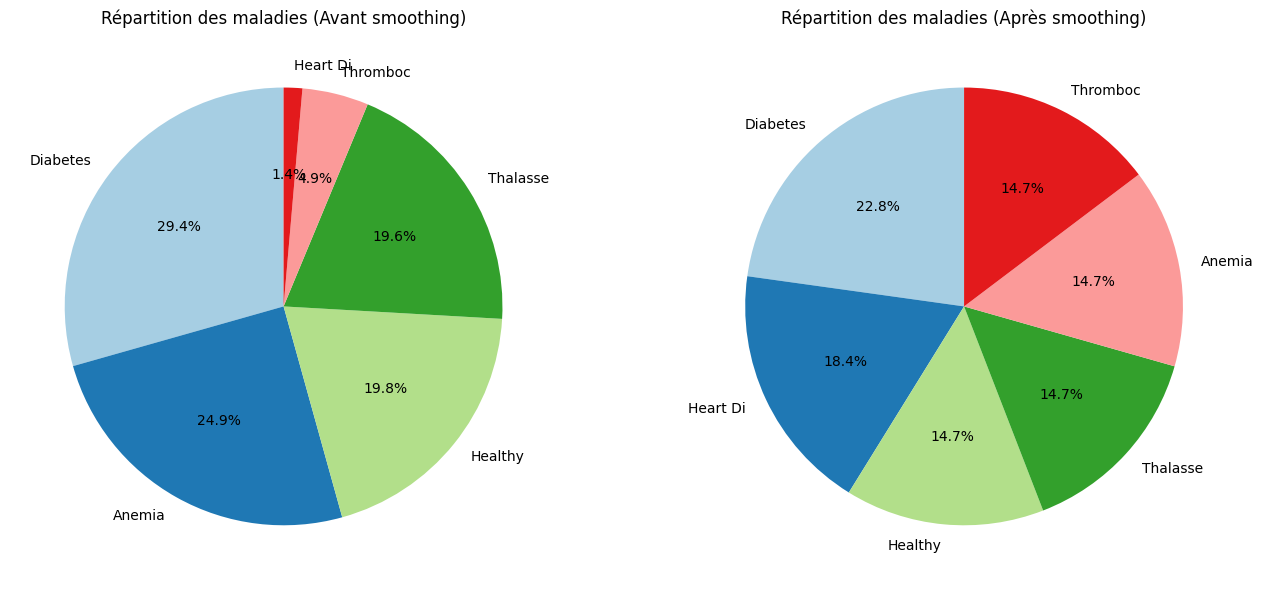

In [22]:
# Chargement des fichiers CSV avec les bons noms
df_before = pd.read_csv("dataset_nova.csv")  # Fichier avant smoothing
df_after = pd.read_csv("dataset_nova_final_corrected_end.csv")  # Fichier après smoothing

# Compter les occurrences des maladies
maladies_before = df_before["Disease"].value_counts()
maladies_after = df_after["Disease"].value_counts()

# Création des sous-plots pour comparer les distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Diagramme circulaire avant smoothing
axes[0].pie(maladies_before, labels=maladies_before.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title("Répartition des maladies (Avant smoothing)")

# Diagramme circulaire après smoothing
axes[1].pie(maladies_after, labels=maladies_after.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title("Répartition des maladies (Après smoothing)")

# Affichage les graphiques
plt.tight_layout()
plt.show()

In [23]:
print(df_balanced_fin.head())

# Vérifier la liste des colonnes
print("\nColonnes du dataset :", df_balanced_fin.columns)

# Vérifier la taille du dataset
print(f"\nTaille du dataset : {df_balanced_fin.shape[0]} lignes, {df_balanced_fin.shape[1]} colonnes")

    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505

C’est une bonne taille pour un modèle IA de classification multi-maladies !
 Points Positifs :

    * SMOTE a été appliqué avec modération → pas d'excès de données artificielles.
    * Les doublons ont été supprimés AVANT SMOTE → meilleure qualité des données.
    * Toutes les maladies ont suffisamment d'échantillons (~200 ou plus).
    * Toutes les colonnes médicales sont présentes et bien normalisées.

In [24]:
print("\nValeurs minimales avant correction :")
print(df_balanced_fin.min())


Valeurs minimales avant correction :
Glucose                                      0.001827
Cholesterol                                  0.003088
Hemoglobin                                   0.000719
Platelets                                    0.000006
White Blood Cells                           -0.000206
Red Blood Cells                              0.000552
Hematocrit                                   0.004556
Mean Corpuscular Volume                      0.000309
Mean Corpuscular Hemoglobin                 -0.000614
Mean Corpuscular Hemoglobin Concentration    0.000719
Insulin                                     -0.000779
BMI                                          0.000051
Systolic Blood Pressure                     -0.000197
Diastolic Blood Pressure                     -0.00036
Triglycerides                                0.001885
HbA1c                                       -0.000991
LDL Cholesterol                              0.001036
HDL Cholesterol                             

In [25]:
num_cols = df_balanced_fin.select_dtypes(include=['number']).columns
df_balanced_fin[num_cols] = df_balanced_fin[num_cols].clip(lower=0)
print(" Toutes les valeurs négatives ont été remplacées par 0.")

 Toutes les valeurs négatives ont été remplacées par 0.



> Nous avons remplacé les valeurs négatives par 0 afin de garantir la cohérence des données. Certaines variables, comme la glycémie, l'hémoglobine ou le cholestérol, ne peuvent pas être négatives d'un point de vue physiologique. Ces valeurs négatives résultaient probablement d'erreurs de mesure ou de transformations incorrectes (normalisation, standardisation). Cette correction permet d'éviter des incohérences et d'assurer une meilleure qualité des données pour l'analyse et la modélisation



In [26]:
print("\nValeurs minimales après correction :")
print(df_balanced_fin.min())


Valeurs minimales après correction :
Glucose                                      0.001827
Cholesterol                                  0.003088
Hemoglobin                                   0.000719
Platelets                                    0.000006
White Blood Cells                                 0.0
Red Blood Cells                              0.000552
Hematocrit                                   0.004556
Mean Corpuscular Volume                      0.000309
Mean Corpuscular Hemoglobin                       0.0
Mean Corpuscular Hemoglobin Concentration    0.000719
Insulin                                           0.0
BMI                                          0.000051
Systolic Blood Pressure                           0.0
Diastolic Blood Pressure                          0.0
Triglycerides                                0.001885
HbA1c                                             0.0
LDL Cholesterol                              0.001036
HDL Cholesterol                             

In [27]:
df_balanced_fin.to_csv("dataset_novaHealth.csv", index=False)
print("---------------------Dataset final prêt !---------------------")

---------------------Dataset final prêt !---------------------


In [28]:
from mtranslate import translate
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv("dataset_novaHealth.csv")

# Traduction des colonnes
df.columns = df.columns.map(lambda x: translate(x, 'fr', 'en'))

# Traduction de la dernière colonne
df[df.columns[-1]] = df[df.columns[-1]].apply(lambda x: translate(str(x), 'fr', 'en'))

# Sauvegarder le fichier CSV traduit
df.to_csv('maladies.csv', index=False)


**Chargement du nouvelle dataset**

In [29]:
df=pd.read_csv("maladies.csv")

**4. Analyse Exploratoire des Données (EDA)**

> L'objectif est de comprendre la distribution des variables, leurs relations et détecter d'éventuels problèmes avant la modélisation

In [30]:
# Vérification des types de données
df.dtypes

,0
Glucose,float64
Cholestérol,float64
Hémoglobine,float64
Plaquettes,float64
Globules blancs,float64
Globules rouges,float64
Hématocrite,float64
Volume corpusculaire moyen,float64
Hémoglobine corpusculaire moyenne,float64
Concentration moyenne d'hémoglobine corpusculaire,float64


**4.1 Distribution des variables**

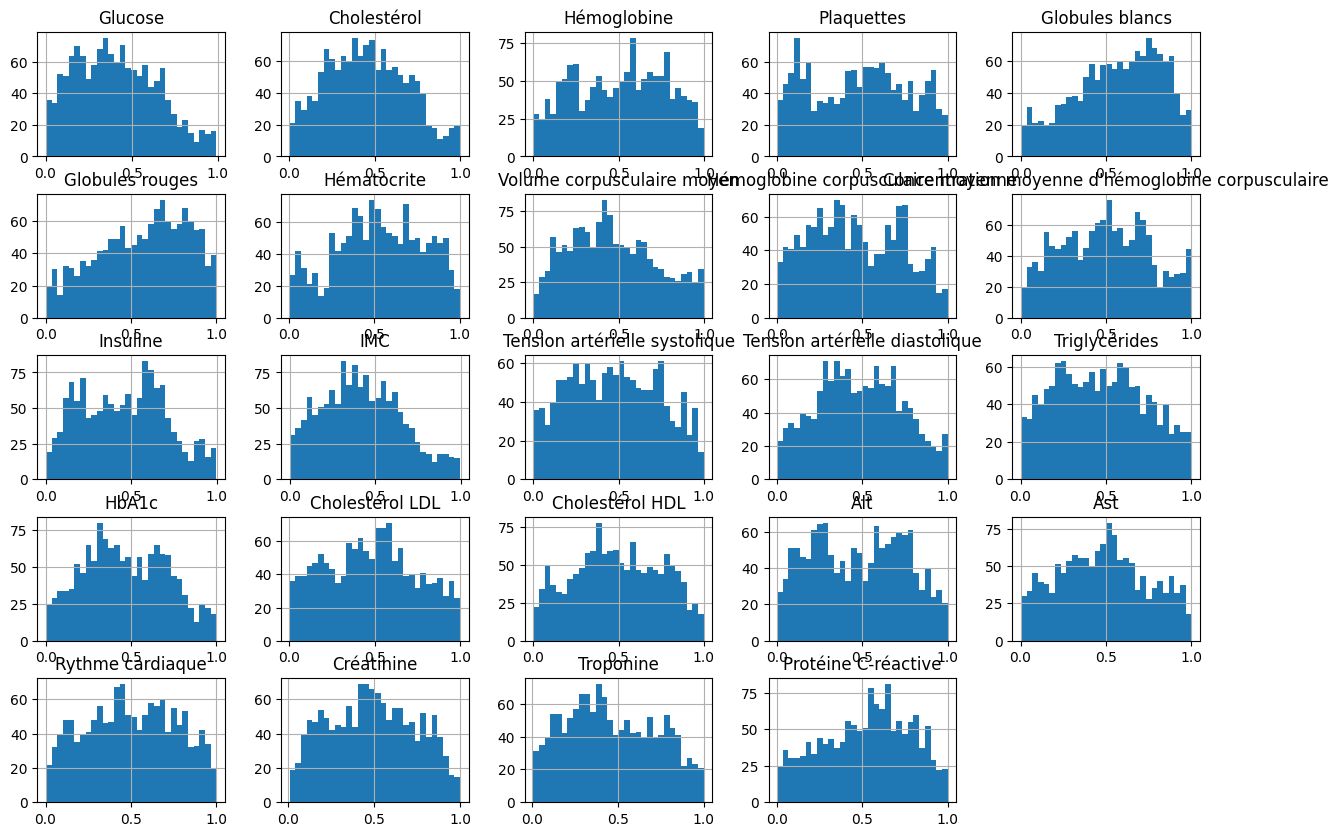

In [31]:
df.hist(figsize=(15, 10), bins=30)
plt.show()

**4.2 Visualisation de la distribution des classes**

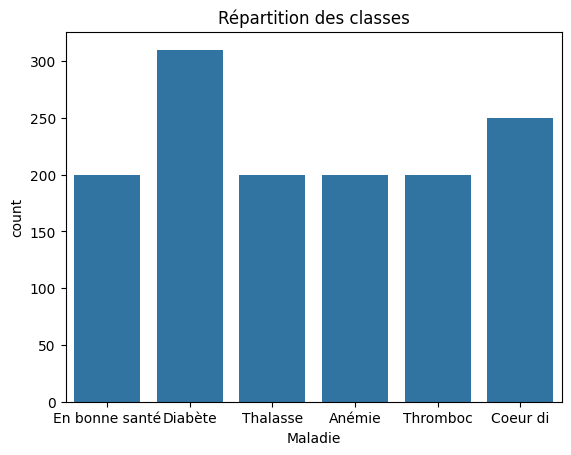

In [32]:
sns.countplot(x=df["Maladie"])
plt.title("Répartition des classes")
plt.show()

**4.3 Affichage des statistiques descriptives**

In [33]:
# Statistiques générales
df.describe()

,Glucose,Cholestérol,Hémoglobine,Plaquettes,Globules blancs,Globules rouges,Hématocrite,Volume corpusculaire moyen,Hémoglobine corpusculaire moyenne,Concentration moyenne d'hémoglobine corpusculaire,...,Triglycérides,HbA1c,Cholestérol LDL,Cholestérol HDL,Alt,Ast,Rythme cardiaque,Créatinine,Troponine,Protéine C-réactive
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,...,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,0.413329,0.455774,0.507790,0.485071,0.565048,0.563662,0.528418,0.465387,0.462678,0.495141,...,0.469233,0.468767,0.480301,0.493040,0.481161,0.485111,0.501294,0.489896,0.465684,0.522656
std,0.236516,0.233468,0.264865,0.281114,0.250904,0.260298,0.253760,0.252553,0.262960,0.256469,...,0.260234,0.243244,0.263060,0.255723,0.268390,0.257811,0.261821,0.249734,0.259653,0.255327
min,0.001827,0.003088,0.000719,0.000006,0.000000,0.000552,0.004556,0.000309,0.000000,0.000719,...,0.001885,0.000000,0.001036,0.000000,0.000000,0.002047,0.002145,0.008831,0.005714,0.000000
25%,0.220017,0.269503,0.265411,0.225728,0.389047,0.367766,0.348208,0.265062,0.246728,0.288045,...,0.248510,0.279733,0.264528,0.301995,0.246433,0.287897,0.293304,0.285478,0.257776,0.323138
50%,0.389212,0.446062,0.528362,0.500820,0.592738,0.599016,0.526220,0.440266,0.440498,0.499981,...,0.464287,0.451040,0.485761,0.485106,0.483182,0.487831,0.494267,0.489355,0.434229,0.550619
75%,0.585579,0.629373,0.731234,0.711886,0.769374,0.782749,0.728623,0.648680,0.690753,0.693089,...,0.669992,0.663354,0.672103,0.703954,0.709450,0.669106,0.713945,0.686324,0.683527,0.720780
max,0.991742,0.999606,0.997876,0.999507,0.999646,1.000000,1.000857,0.996362,0.999234,0.999666,...,0.999826,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488


**5. Prétraitement des Données**

In [34]:
df.dtypes

,0
Glucose,float64
Cholestérol,float64
Hémoglobine,float64
Plaquettes,float64
Globules blancs,float64
Globules rouges,float64
Hématocrite,float64
Volume corpusculaire moyen,float64
Hémoglobine corpusculaire moyenne,float64
Concentration moyenne d'hémoglobine corpusculaire,float64


**Matrice de corrélation**

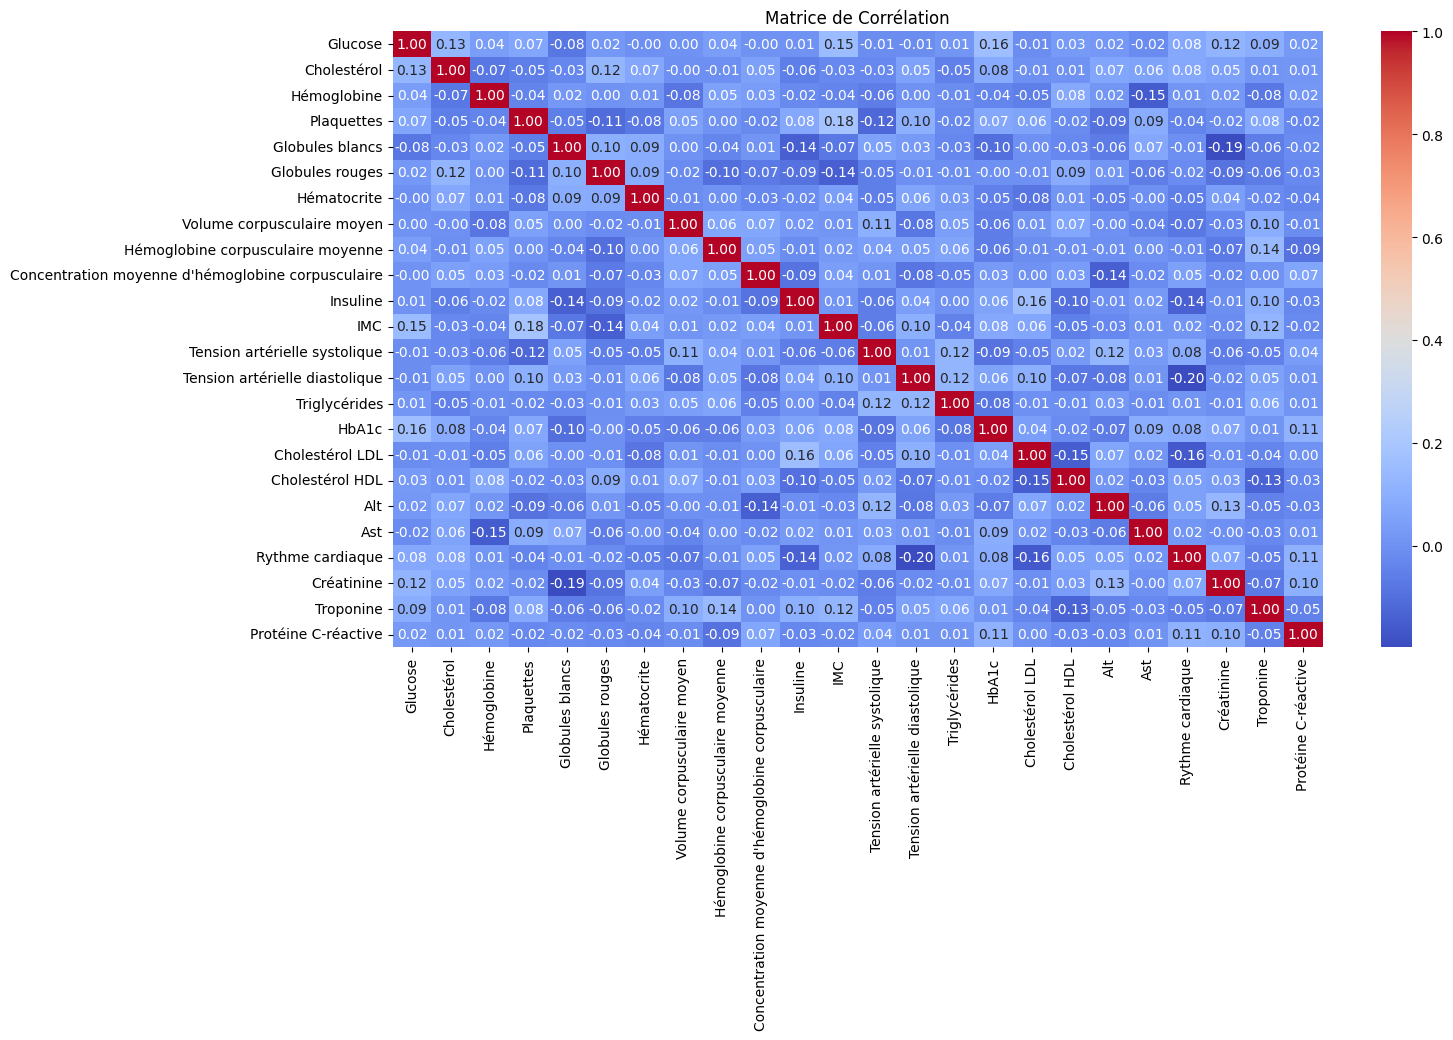

In [35]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

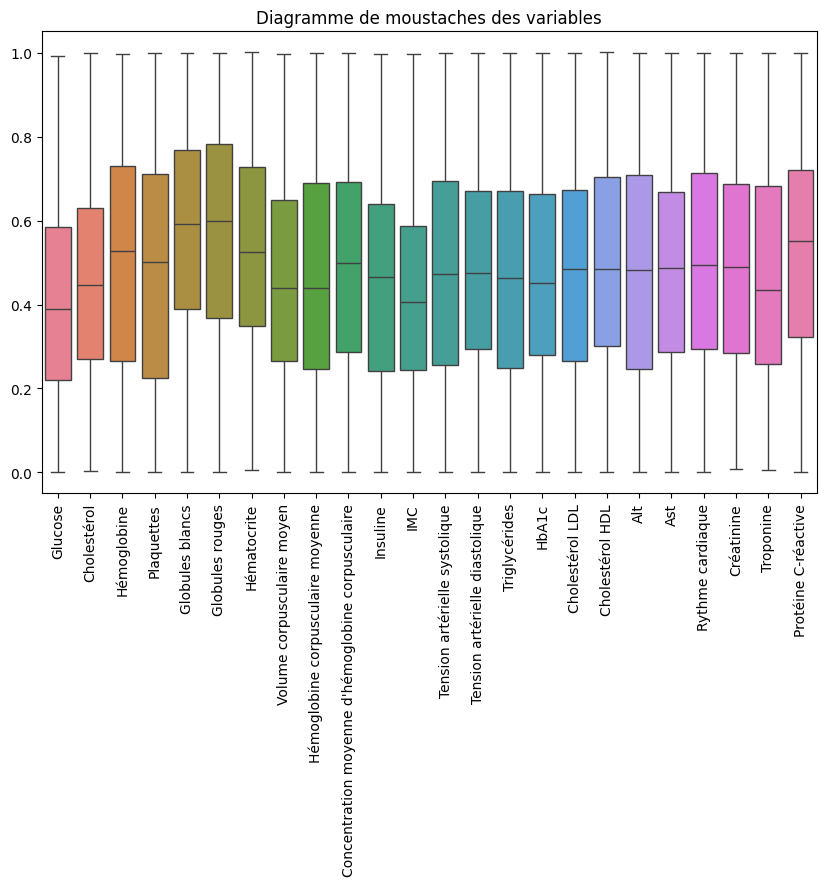

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagramme de moustache pour chaque colonne numérique (incluant "Maladie")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Diagramme de moustaches des variables")
plt.xticks(rotation=90)  # Pour une meilleure lisibilité des labels si nécessaire
plt.show()

**XGBoost**
---

In [37]:


# Afficher un aperçu du dataset
print(df.head())  # Vérifier que le dataset est bien chargé

import xgboost as xgb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("maladies.csv")

# Charger les données
features = df.columns[:-1]  #  Sélection des 24 colonnes (supposons que la dernière colonne soit la cible)
X = df[features]
y = df["Maladie"]  #  Colonne cible

# Encoder les labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Séparer les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Entraîner le modèle XGBoost
model = xgb.XGBClassifier(
    n_estimators=300,  #  Nombre d'arbres (optimisé)
    learning_rate=0.03,  #  Vitesse d’apprentissage plus fine
    max_depth=8,  #  Profondeur plus grande pour de meilleures performances
    subsample=0.8,  #  Sous-échantillonnage pour éviter l'overfitting
    colsample_bytree=0.8,  #  Sélection aléatoire des features
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

model.fit(X_train, y_train)

# Enregistrer le modèle et l’encodeur dans un fichier
model_path = "models_file.pkl"  #  Sauvegarde locale
with open(model_path, "wb") as file:
    pickle.dump((model, label_encoder), file)

print(f"✅ Modèle sauvegardé sous : {model_path}")

    Glucose  Cholestérol  Hémoglobine  Plaquettes  Globules blancs  \
0  0.739597     0.650198     0.713631    0.868491         0.687433   
1  0.121786     0.023058     0.944893    0.905372         0.507711   
2  0.452539     0.116135     0.544560    0.400640         0.294538   
3  0.136609     0.015605     0.419957    0.191487         0.081168   
4  0.176737     0.752220     0.971779    0.785286         0.443880   

   Globules rouges  Hématocrite  Volume corpusculaire moyen  \
0         0.529895     0.290006                    0.631045   
1         0.403033     0.164216                    0.307553   
2         0.382021     0.625267                    0.295122   
3         0.166214     0.073293                    0.668719   
4         0.439851     0.894991                    0.442159   

   Hémoglobine corpusculaire moyenne  \
0                           0.001328   
1                           0.207938   
2                           0.868369   
3                           0.125447   


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:14:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Modèle sauvegardé sous : models_file.pkl


In [38]:
# Tester la précision sur l'ensemble de test
accuracy = model.score(X_test, y_test)
print(f"Précision du modèle sur l'ensemble de test : {accuracy:.2f}")

Précision du modèle sur l'ensemble de test : 0.99


In [39]:
# Prédire les probabilités sur l'ensemble de test
predictions_probabilities = model.predict_proba(X_test)

# Afficher les probabilités de prédiction pour les premières instances avec interprétation
for i in range(5):  # Pour les 5 premières instances
    print(f"Instance {i+1} :")
    for j, class_prob in enumerate(predictions_probabilities[i]):
        class_name = label_encoder.inverse_transform([j])[0]  # Obtenir le nom de la classe
        print(f"  - {class_name}: {class_prob:.2f} pour {class_name}")

Instance 1 :
  - Anémie: 0.01 pour Anémie
  - Coeur di: 0.01 pour Coeur di
  - Diabète: 0.03 pour Diabète
  - En bonne santé: 0.03 pour En bonne santé
  - Thalasse: 0.92 pour Thalasse
  - Thromboc: 0.01 pour Thromboc
Instance 2 :
  - Anémie: 0.01 pour Anémie
  - Coeur di: 0.00 pour Coeur di
  - Diabète: 0.00 pour Diabète
  - En bonne santé: 0.01 pour En bonne santé
  - Thalasse: 0.98 pour Thalasse
  - Thromboc: 0.00 pour Thromboc
Instance 3 :
  - Anémie: 0.00 pour Anémie
  - Coeur di: 0.00 pour Coeur di
  - Diabète: 0.00 pour Diabète
  - En bonne santé: 0.00 pour En bonne santé
  - Thalasse: 0.00 pour Thalasse
  - Thromboc: 0.99 pour Thromboc
Instance 4 :
  - Anémie: 0.00 pour Anémie
  - Coeur di: 0.00 pour Coeur di
  - Diabète: 1.00 pour Diabète
  - En bonne santé: 0.00 pour En bonne santé
  - Thalasse: 0.00 pour Thalasse
  - Thromboc: 0.00 pour Thromboc
Instance 5 :
  - Anémie: 0.00 pour Anémie
  - Coeur di: 0.00 pour Coeur di
  - Diabète: 0.00 pour Diabète
  - En bonne santé: 0.01 p

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import pickle
import numpy as np

# Charger les données
data = pd.read_csv('maladies.csv')

# Sélectionner les features et la target
X = data.drop('Maladie', axis=1)
y = data['Maladie']

# Encoder la cible
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Créer et entraîner le modèle XGBoost sur toutes les caractéristiques pour évaluer l'importance
initial_model = XGBClassifier(eval_metric='logloss')
initial_model.fit(X_train, y_train)

# Évaluer l'importance des caractéristiques
importances = initial_model.feature_importances_

# Obtenir les indices des 9 caractéristiques les plus importantes
indices = np.argsort(importances)[-9:]  # Les 9 plus importantes

# Sélectionner les 9 caractéristiques les plus importantes
X_train_important = X_train.iloc[:, indices]
X_test_important = X_test.iloc[:, indices]

# Afficher les noms des 9 caractéristiques importantes
important_features = X.columns[indices]
print("Les 9 caractéristiques les plus importantes :")
for feature in important_features:
    print(feature)

# Entraîner le modèle uniquement avec les caractéristiques sélectionnées
final_model = XGBClassifier(eval_metric='logloss')
final_model.fit(X_train_important, y_train)
# Enregistrer le modèle et l’encodeur dans un fichier
model_path = "models_manu.pkl"  # 🔹 Sauvegarde locale
with open(model_path, "wb") as file:
    pickle.dump((initial_model, label_encoder), file)

print(f"✅ Modèle sauvegardé sous : {model_path}")

Les 9 caractéristiques les plus importantes :
Globules rouges
Volume corpusculaire moyen
Concentration moyenne d'hémoglobine corpusculaire
Hématocrite
Glucose
Cholestérol
IMC
Insuline
Plaquettes
✅ Modèle sauvegardé sous : models_manu.pkl


In [ ]:
# Prédire les probabilités sur l'ensemble de test
predictions_probabilities = final_model.predict_proba(X_test_important)

# Afficher les probabilités de prédiction pour les premières instances avec interprétation
for i in range(5):  # Pour les 5 premières instances
    print(f"Instance {i+1} :")
    for j, class_prob in enumerate(predictions_probabilities[i]):
        class_name = label_encoder.inverse_transform([j])[0]  # Obtenir le nom de la classe
        print(f"  - {class_name}: {class_prob:.2f} pour {class_name}")

**Random Forest**
---

In [43]:
from sklearn.model_selection import cross_val_score

df = pd.read_csv('maladies.csv')

# Encoder la variable cible
label_encoder = LabelEncoder()
df["Maladie"] = label_encoder.fit_transform(df["Maladie"])

# Séparer les caractéristiques et la cible
X = df.drop(columns=["Maladie"])
y = df["Maladie"]

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Validation croisée
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Entraîner le modèle sur l'ensemble d'entraînement
rf_model.fit(X_train, y_train)

# Faire des prédictions
y_pred = rf_model.predict(X_test)

# Rapport de classification
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Afficher le rapport sous forme de DataFrame
classification_df = pd.DataFrame(classification_rep).transpose()
from IPython.display import display
display(classification_df)

,precision,recall,f1-score,support
Anémie,0.948718,0.925000,0.936709,40.000000
Coeur di,0.980000,0.980000,0.980000,50.000000
Diabète,0.937500,0.967742,0.952381,62.000000
En bonne santé,1.000000,1.000000,1.000000,40.000000
Thalasse,1.000000,0.975000,0.987342,40.000000
Thromboc,1.000000,1.000000,1.000000,40.000000
accuracy,0.974265,0.974265,0.974265,0.974265
macro avg,0.977703,0.974624,0.976072,272.000000
weighted avg,0.974536,0.974265,0.974300,272.000000


**ANN**
---

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
data = pd.read_csv('maladies.csv')  # Remplacez par votre dataset

# Séparation des features et de la cible (target)
X = data.drop(columns=['Maladie'])  # Remplacez 'Maladie' par le vrai nom de votre colonne cible
y = data['Maladie']

# Encodage One-Hot de la cible
ohe = LabelBinarizer()
y_encoded = ohe.fit_transform(y)

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparer en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Construction du modèle ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')  # Multiclass output
])

# Compilation du modèle
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Sauvegarde du modèle
model.save('ann_multiclass_model.h5')


# Prédictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Rapport de classification
print(classification_report(y_test_classes, y_pred_classes, target_names=ohe.classes_))

# Score AUC
auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f'AUC Score: {auc_score:.4f}')